## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [3]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/
import pandas as pd
import numpy as np

In [232]:
# 1. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

#Converting to csv and then dataframe
data_raw = pd.read_csv('data_000637.txt', sep=",", header = 'infer')
#data_raw.to_csv('data_000637.csv', index = None)
N = 109957 #choosing N
data_final = data_raw.loc[0:N,:] #crossection of the required dataframe as per question
data_final #Final DataFrame

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
109953,1,0,61,3869201260,2053,13
109954,1,0,32,3869201260,2496,0
109955,1,1,36,3869201260,2494,4
109956,1,1,37,3869201260,2497,21


In [233]:
#2. Find out the number of BX in a ORBIT (the value 'x').

#Note: Here I'm using the Raw dataframe and NOT the sliced data frame I created for question 1!
#data_raw.head()
data_use = data_raw.loc[0:N,['ORBIT_CNT','BX_COUNTER']]
#data_use.head()
data_use['X_CNT'] = data_use['ORBIT_CNT']/data_use['BX_COUNTER'] #calculating x
#data_use.head()
data_useNew = data_use.groupby('ORBIT_CNT')['X_CNT'].apply(lambda x: x.unique()).reset_index() #sorting all unique values of BX for each Orbit
data_useNew
#test = data_useNew.iloc[:,1]
#test.head()
#lst_col = data_useNew['X_CNT']
#lst_col

#test = data_useNew[lst_col].str.len()
#data_useNew.head()
#sum(map(len, data_useNew.X_CNT))
#data_useNew.X_CNT.str.len().sum()
#import itertools
#X = data_use.loc[:,'ORBIT_CNT']
#Y = [(x, (len(list(y)))) for x, y in itertools.groupby(X)]
#type(Y)
#counter = pd.DataFrame(Y,columns=['ORBIT_CNT', 'NUMBER_OF_BX']) 
#counter #The number of BX in a Orbit

,ORBIT_CNT,X_CNT
0,3869200167,"[1629823.153748947, 1515550.3983548766, 151258..."
1,3869200168,"[552742881.1428572, 297630782.15384614, 483650..."
2,3869200169,"[3869200169.0, 29535879.152671754, 29312122.49..."
3,3869200170,"[4573522.659574468, 4562736.049528302, 4541314..."
4,3869200171,"[30953601.368, 14767939.583969466, 14824521.72..."
...,...,...
1089,3869201256,"[8793639.218181819, 6291384.156097561, 6281170..."
1090,3869201257,"[28874636.246268656, 28242344.94160584, 272478..."
1091,3869201258,"[227600074.0, 21259347.57142857, 21028267.7065..."
1092,3869201259,"[33940361.921052635, 33645228.33913043, 302281..."


In [234]:
#3. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.
# data_useNew.shape[0] ; This is slower as each loop takes longer to execute using this method

print(len(data_useNew.index), ': Data taking total time') #Faster method therefore more efficient with bigger dataframes

1094

In [235]:
#4. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).
#data_raw = pd.read_csv('data_000637.txt', sep=",", header = 'infer')
data_absT = data_raw.copy()
data_absT['ABS_T(ns)'] = data_absT['ORBIT_CNT']+(25*data_absT['BX_COUNTER'])+(data_absT['TDC_MEAS']*(25/30))
data_absT

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_T(ns)
0,1,0,123,3869200167,2374,26,3.869260e+09
1,1,0,124,3869200167,2374,27,3.869260e+09
2,1,0,63,3869200167,2553,28,3.869264e+09
3,1,0,64,3869200167,2558,19,3.869264e+09
4,1,0,64,3869200167,2760,25,3.869269e+09


In [228]:
#5. Replace the values (all 1) of the HEAD column randomly with 0 or 1.
import random
#data_raw = pd.read_csv('data_000637.txt', sep=",", header = 'infer')
data_replace = data_raw.copy()
#len(data_replace.index)
test_list = [0,1] 
#random_num = random.choice(test_list)
l = [random.choice(test_list) for i in range(len(data_replace.index))] #Generating random 1s or 0s
data_replace['newcol']=l #new column with the random generated numbers
data_replace['HEAD'] = data_replace['newcol'] #replacing the values in HEAD with the new column
data_replace = data_replace.drop(['newcol'], axis=1) #Dropping the new column
#data_replace.assign(HEAD = data_replace['newcol'])
data_replace #Final DataFrame

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_T(ns)
0,1,0,123,3869200167,2374,26,3.869260e+09
1,0,0,124,3869200167,2374,27,3.869260e+09
2,0,0,63,3869200167,2553,28,3.869264e+09
3,0,0,64,3869200167,2558,19,3.869264e+09
4,0,0,64,3869200167,2760,25,3.869269e+09
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,3.869230e+09
1310716,1,1,4,3869211171,763,11,3.869230e+09
1310717,1,0,64,3869211171,764,0,3.869230e+09
1310718,0,0,139,3869211171,769,0,3.869230e+09


In [236]:
#6. Create a new DataFrame that contains only the rows with HEAD=1.
data_only1 = data_replace.loc[data_replace['HEAD'] == 1]
data_only1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_T(ns)
0,1,0,123,3869200167,2374,26,3.869260e+09
5,1,0,63,3869200167,2762,4,3.869269e+09
7,1,0,139,3869200167,2776,0,3.869270e+09
11,1,0,64,3869200167,2786,19,3.869270e+09
12,1,1,6,3869200167,2792,18,3.869270e+09
...,...,...,...,...,...,...,...
1310709,1,1,38,3869211171,417,8,3.869222e+09
1310712,1,1,35,3869211171,429,4,3.869222e+09
1310713,1,0,64,3869211171,758,18,3.869230e+09
1310716,1,1,4,3869211171,763,11,3.869230e+09


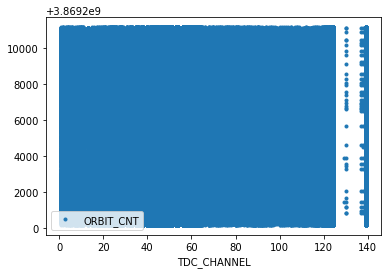

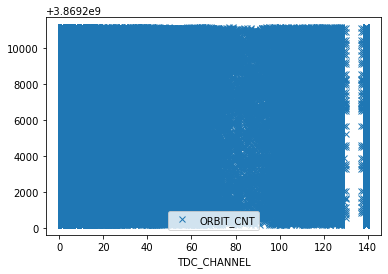

In [273]:
#7. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel
import matplotlib.pyplot as plt
import seaborn as sns
#data_raw = pd.read_csv('data_000637.txt', sep=",", header = 'infer')
data_plot = data_raw.copy()
data_plotA = data_plot.loc[data_plot['FPGA'] == 0]
#data_plotA = data_plotA.loc[:, ['FPGA', 'TDC_CHANNEL']] #df.loc[:,['A','B']]
#plt.figure(); data_plotA.plot.scatter(); plt.legend(loc='best')
#sns.scatterplot(x="FPGA", y="TDC_CHANNEL", data=data_plotA)
#plt.scatter(data_plotA['FPGA'], data_plotA['TDC_CHANNEL'])
data_plotB = data_plot.loc[data_plot['FPGA'] == 1]
#data_plotB = data_plotB.loc[:, ['FPGA', 'TDC_CHANNEL']]

#NOTE: Here, I have used the count of ORBIT_CNT as number of counts
data_plotA.plot(x='TDC_CHANNEL', y = 'ORBIT_CNT', style='.')
data_plotB.plot(x='TDC_CHANNEL', y = 'ORBIT_CNT', style='x')

In [276]:
#8. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)
data_plot.groupby('TDC_CHANNEL').sum()
#NOTE: Here, I have used the count of ORBIT_CNT as number of counts
#data_plot['ORBIT_CNT'].nlargest(3)
data_plot.iloc[data_plot['ORBIT_CNT'].argsort()[-3:]] #Recording the most orbit counts across all TDC channels

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310718,1,0,139,3869211171,769,0
1310707,1,0,57,3869211171,137,29
1310719,1,0,61,3869211171,762,18


In [309]:
#9. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139
data_unique = data_raw.copy()
unique = data_unique.groupby('ORBIT_CNT')['TDC_CHANNEL'].apply(lambda x: x.unique()).reset_index() #sorting all unique values of TDC for each Orbit
print(len(unique), ': Total Number of Unique Orbits') #Total Number of Unique Orbits

data_uniqueTDC = data_unique.groupby(['TDC_CHANNEL']).get_group(139)
uniqueTDC = data_uniqueTDC.groupby('ORBIT_CNT')['TDC_CHANNEL'].apply(lambda x: x.unique()).reset_index() #sorting all unique Orbits with at least one measurement from TDC_CHANNEL = 139
print(len(uniqueTDC), ': Number of Unique Orbits with at least one TDC_CHANNEL = 139') #Number of Unique Orbits with at least one TDC_CHANNEL = 139

11001 : Total Number of Unique Orbits
10976 : Number of Unique Orbits with at least one TDC_CHANNEL = 139
